<a href="https://colab.research.google.com/github/alessephd/social-media-mental-health/blob/main/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SOCIAL MEDIA AND MENTAL HEALTH**

## Concise and insightful analysis regarding social media use and its potential implications for mental health



**This data reveals valuable insights into how social media usage correlates with emotional states, with implications for designing more personalized and proactive mental health interventions. The strong accuracy and performance of the model suggest that real-time emotional monitoring can be effectively applied to improve users' mental health, providing a pathway for tools that support mental well-being alongside social media engagement.**

In [38]:
!git clone https://github.com/alessephd/social-media-mental-health.git


fatal: destination path 'social-media-mental-health' already exists and is not an empty directory.


In [ ]:
!ls /content/social-media-mental-health/


data  LICENSE  models  README.md  results  src


In [39]:
!pip install --upgrade kagglehub


In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emirhanai/social-media-usage-and-emotional-well-being")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/emirhanai/social-media-usage-and-emotional-well-being/versions/1


In [41]:
import os

# Path to the extracted dataset
dataset_path = '/root/.cache/kagglehub/datasets/emirhanai/social-media-usage-and-emotional-well-being/versions/1'

# List all files in the folder
os.listdir(dataset_path)


['train.csv', 'test.csv', 'val.csv']

In [42]:
# Define the file path to train.csv
train_file_path = os.path.join(dataset_path, 'train.csv')

# Load the training dataset into a DataFrame
df = pd.read_csv(train_file_path)

# Display the first few rows to confirm it loaded correctly
df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [43]:
# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


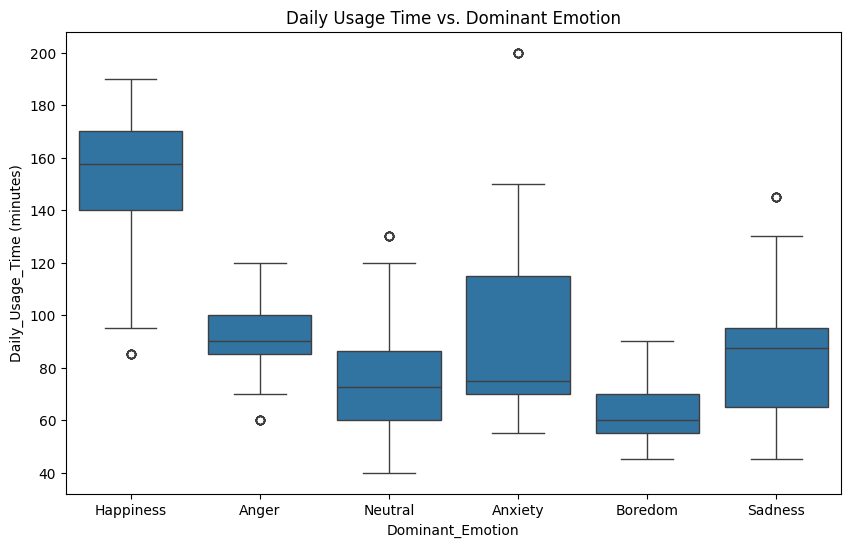

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Daily Usage Time vs. Dominant Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dominant_Emotion', y='Daily_Usage_Time (minutes)')
plt.title('Daily Usage Time vs. Dominant Emotion')
plt.show()


In [45]:
# Handle missing values if needed (you can choose to drop or fill them)
df = df.dropna()  # Alternatively, you could use df.fillna(method='ffill') or other techniques

# One-Hot Encode the 'Gender' column if it's categorical
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Prepare the feature and target columns
X = df[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male']]  # Gender_Male is the encoded column
y = df['Dominant_Emotion']

# Encode the target variable 'Dominant_Emotion' (since it's categorical)
y = pd.factorize(y)[0]

# Check the processed features and target
X.head(), y[:5]


(  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
 0  25                       120.0            3.0                    45.0   
 1  30                        90.0            5.0                    20.0   
 2  22                        60.0            2.0                    15.0   
 3  28                       200.0            8.0                   100.0   
 4  33                        45.0            1.0                     5.0   
 
    Comments_Received_Per_Day  Messages_Sent_Per_Day  Gender_Male  
 0                       10.0                   12.0        False  
 1                       25.0                   30.0         True  
 2                        5.0                   20.0        False  
 3                       30.0                   50.0        False  
 4                        2.0                   10.0         True  ,
 array([0, 1, 2, 3, 4]))

In [46]:
# Check the columns in the DataFrame
print(df.columns)


Index(['User_ID', 'Age', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_22', 'Gender_23',
       'Gender_24', 'Gender_25', 'Gender_26', 'Gender_27', 'Gender_28',
       'Gender_29', 'Gender_30', 'Gender_31', 'Gender_32', 'Gender_33',
       'Gender_34', 'Gender_35', 'Gender_Female', 'Gender_Male',
       'Gender_Non-binary'],
      dtype='object')


In [60]:
# Check data types
print(X.dtypes)


Age                            object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Gender_Female                   int64
Gender_Male                     int64
Gender_Non-binary               int64
dtype: object


In [48]:
# Check unique values in the target variable to ensure it's encoded correctly
print(pd.factorize(df['Dominant_Emotion'])[0])


[0 1 2 3 4 0 1 5 2 0 3 5 4 0 1 2 3 5 2 0 3 1 4 0 5 2 3 0 1 5 4 0 2 5 3 4 0
 1 2 3 5 0 1 2 4 0 5 3 2 4 0 1 2 5 3 3 4 5 0 4 0 1 2 3 5 4 0 2 3 5 0 4 2 1
 2 3 0 5 3 2 5 0 1 2 4 3 5 2 0 3 4 1 2 5 3 4 2 0 1 2 0 1 2 3 4 0 1 5 2 0 3
 5 4 0 1 2 3 5 2 0 3 1 4 0 5 2 3 0 1 5 4 0 2 5 3 4 0 1 2 3 5 0 1 2 4 0 5 3
 2 4 0 1 2 5 3 3 4 5 0 4 0 1 2 3 5 4 0 2 3 5 0 4 2 1 2 3 0 5 3 2 5 0 1 2 4
 3 5 2 0 3 4 1 2 5 3 4 2 0 1 2 0 1 2 3 4 0 1 5 2 0 3 5 4 0 1 2 3 5 2 0 3 1
 4 0 5 2 3 0 1 5 4 0 2 5 3 4 0 1 2 3 5 0 1 2 4 0 5 3 2 4 0 1 2 5 3 3 4 5 0
 4 0 1 2 3 5 4 0 2 3 5 0 4 2 1 2 3 0 5 3 2 5 0 1 2 4 3 5 2 0 3 4 1 2 5 3 4
 2 0 1 2 0 1 2 3 4 0 1 5 2 0 3 5 4 0 1 2 3 5 2 0 3 1 4 0 5 2 3 0 1 5 4 0 2
 5 3 4 0 1 2 3 5 0 1 2 4 0 5 3 2 4 0 1 2 5 3 3 4 5 0 4 0 1 2 3 5 4 0 2 3 5
 0 4 2 1 2 3 0 5 3 2 5 0 1 2 4 3 5 2 0 3 4 1 2 5 3 4 2 0 1 2 0 1 2 3 4 0 1
 5 2 0 3 5 4 0 1 2 3 5 2 0 3 1 4 0 5 2 3 0 1 5 4 0 2 5 3 4 0 1 2 3 5 0 1 2
 4 0 5 3 2 4 0 1 2 5 3 3 4 5 0 4 0 1 2 3 5 4 0 2 3 5 0 4 2 1 2 3 0 5 3 2 5
 0 1 2 4 3 5 2 0 3 4 1 2 

In [49]:
# Check for missing values in the target variable
print(df['Dominant_Emotion'].isnull().sum())


0


In [52]:
# Ensure the target variable is numeric
y = pd.factorize(df['Dominant_Emotion'])[0]


In [63]:
# Convert 'Age' column to numeric
X['Age'] = pd.to_numeric(X['Age'], errors='coerce')

# Fill any missing values created by the conversion with the mean age
X['Age'] = X['Age'].fillna(X['Age'].mean())

# Now, proceed with your model training
# ... rest of your code ...

<ipython-input-63-2d6412ab1da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = pd.to_numeric(X['Age'], errors='coerce')
<ipython-input-63-2d6412ab1da0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())


In [64]:
# Convert 'Age' to numeric, coercing errors to NaN
X['Age'] = pd.to_numeric(X['Age'], errors='coerce')

# Handle any missing values in 'Age' (using mean imputation as an example)
X['Age'] = X['Age'].fillna(X['Age'].mean())

# Check the data types again
print(X.dtypes)


Age                           float64
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Gender_Female                   int64
Gender_Male                     int64
Gender_Non-binary               int64
dtype: object


<ipython-input-64-9a2155f91d52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = pd.to_numeric(X['Age'], errors='coerce')
<ipython-input-64-9a2155f91d52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())


In [65]:
# Check for missing values in all columns
print(X.isnull().sum())


Age                           0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Gender_Female                 0
Gender_Male                   0
Gender_Non-binary             0
dtype: int64


In [66]:
X.loc[:, 'Age'] = pd.to_numeric(X['Age'], errors='coerce')
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())


In [67]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Training features shape: (800, 9)
Testing features shape: (200, 9)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        29
           2       0.98      1.00      0.99        42
           3       1.00      0.97      0.99        39
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        24

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



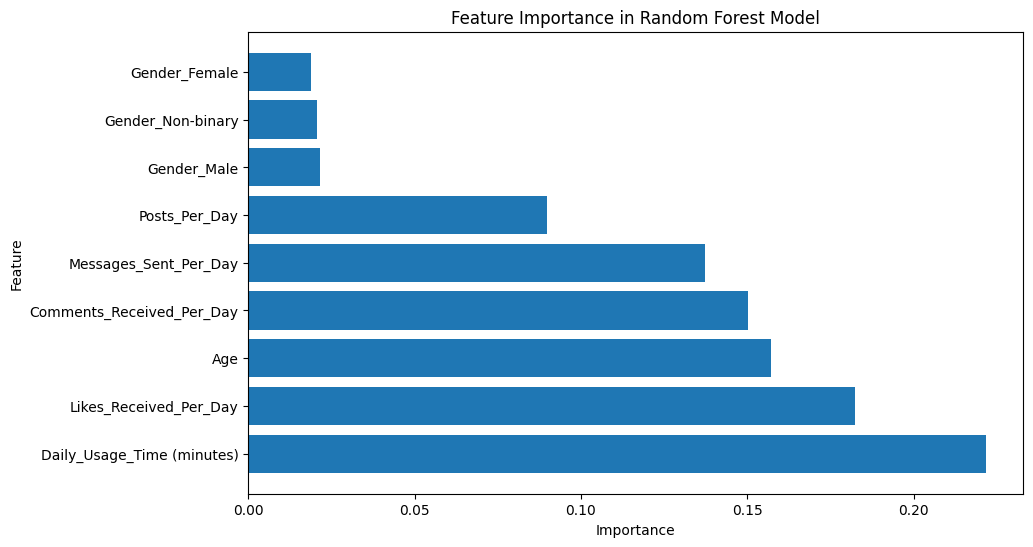

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [78]:
# Check if the model is fitted by verifying it has the 'estimators_' attribute
if hasattr(model, 'estimators_'):
    print("Model is fitted.")
else:
    print("Model is not fitted. Fitting the model now.")
    model.fit(X_train, y_train)  # Ensure the model is trained on your training data


Model is not fitted. Fitting the model now.


In [79]:
# Check for missing values in X_train and y_train
print(X_train.isnull().sum())  # Should print 0 for no missing values
print(y_train.isnull().sum())  # Should print 0 for no missing values

# Check the shapes of the training data
print(X_train.shape, y_train.shape)


Age                           0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Gender_Female                 0
Gender_Male                   0
Gender_Non-binary             0
dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [80]:
# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

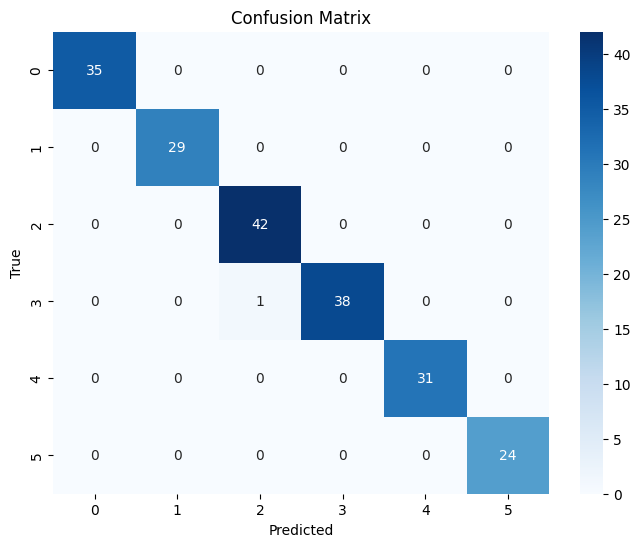

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted classes from the model
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Classification Report (Precision, Recall, F1-Score)
Visualize the precision, recall, and F1-score for each class to show how well the model is performing on each emotion.

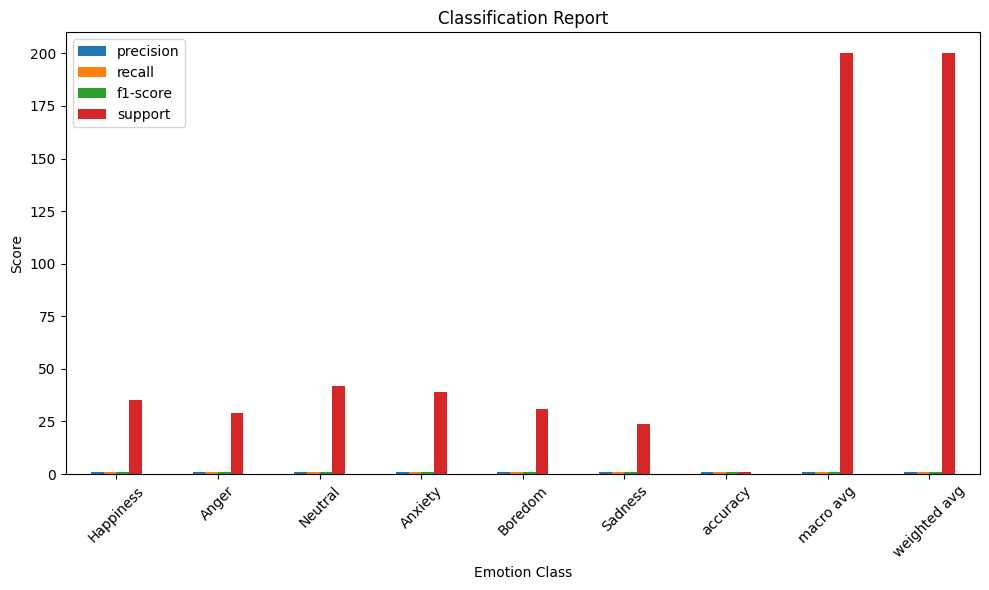

In [71]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred, target_names=df['Dominant_Emotion'].unique(), output_dict=True)

# Convert the report to a DataFrame for easy plotting
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score for each class
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xlabel('Emotion Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ROC Curve (Receiver Operating Characteristic)
If you have binary classification (or can modify the problem to be binary), you can plot the ROC curve to show how well the model distinguishes between two classes.

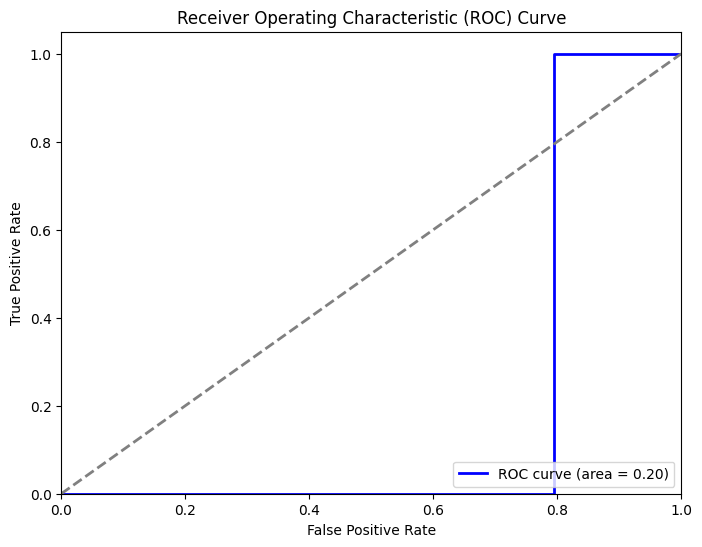

In [72]:
from sklearn.metrics import roc_curve, auc

# Only if you have binary classification, otherwise use one-vs-rest for multi-class
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Feature Importance
Plotting the importance of features helps stakeholders understand which variables (e.g., age, daily usage time) are most influencing the model’s predictions.

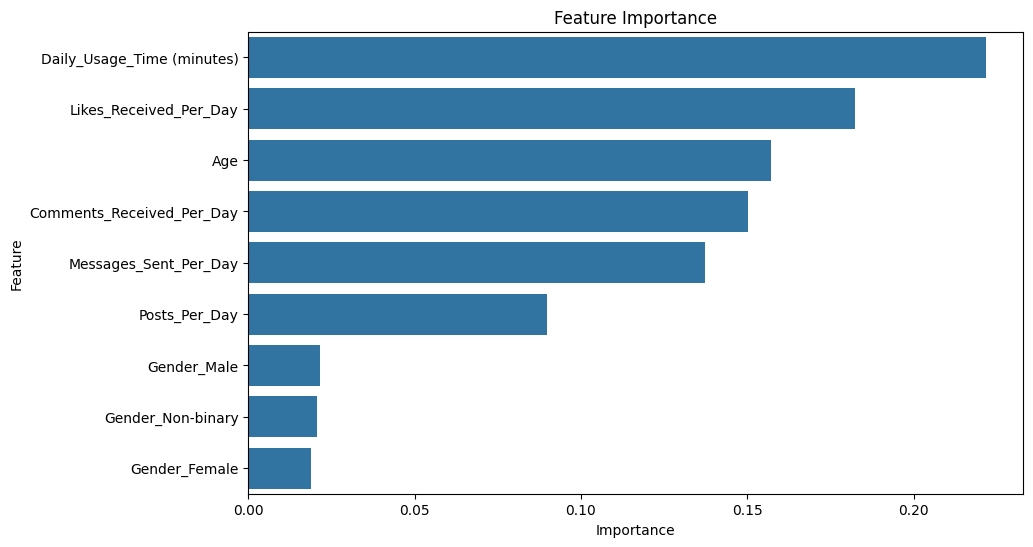

In [82]:
# Check if the model is a RandomForestClassifier
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_

    # Create a DataFrame with feature names and their importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Model does not have feature_importances_ attribute.")


## Model Performance Over Time (Learning Curve)
This plot shows how the model’s performance (both training and testing scores) improves as the amount of training data increases. It can be useful to show stakeholders how well the model learns over time.

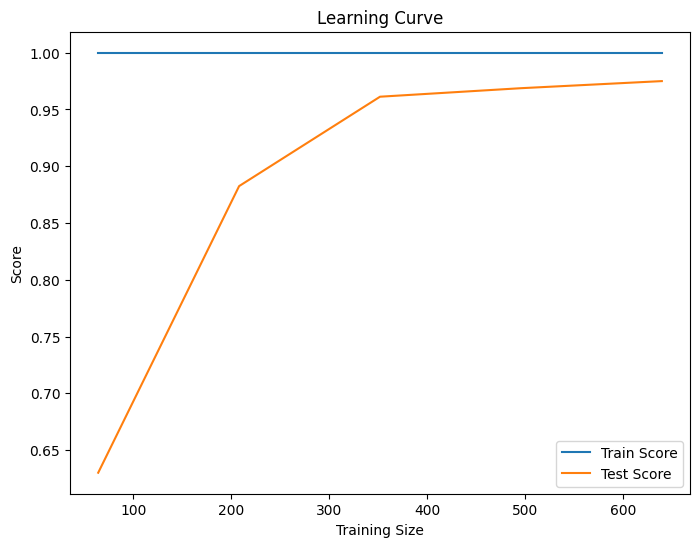

In [75]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


## Prediction Distribution (Distribution of Predicted Classes)
This bar chart shows how the predicted emotions are distributed across the test set. It can be useful to detect if the model has any bias toward certain classes.

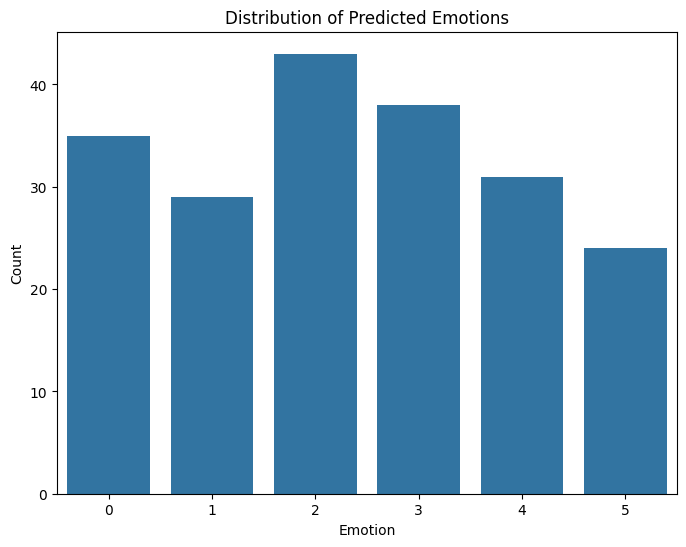

In [76]:
# Plot the distribution of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [83]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=df['Dominant_Emotion'].unique())

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   Happiness       1.00      1.00      1.00        35
       Anger       1.00      1.00      1.00        29
     Neutral       0.98      1.00      0.99        42
     Anxiety       1.00      0.97      0.99        39
     Boredom       1.00      1.00      1.00        31
     Sadness       1.00      1.00      1.00        24

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



In [84]:
from sklearn.metrics import confusion_matrix

# Get the predicted classes from the model
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a DataFrame for better readability
import pandas as pd

# Convert confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, index=df['Dominant_Emotion'].unique(), columns=df['Dominant_Emotion'].unique())

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)


Confusion Matrix:
           Happiness  Anger  Neutral  Anxiety  Boredom  Sadness
Happiness         35      0        0        0        0        0
Anger              0     29        0        0        0        0
Neutral            0      0       42        0        0        0
Anxiety            0      0        1       38        0        0
Boredom            0      0        0        0       31        0
Sadness            0      0        0        0        0       24
